# Project Proposal : diabetes data

**For the project, I propose to analyse the diabetes data available at 'UCI Machine Learning Repository'. The data has more than hundred thousands entries with fifty features. The data comprised of demographic informations of diabetes patients along with a detailed description of medications during their inpatient visit at a hospital. The primary aim of the analysis is to examine if certain decisions made during patients' hospital visit would be helpful to predict their discharge to home. Also, it would be interesting to test if any combinations of the features in the data play a major role as predictors of readmission in the future. The motivation is, these predictors can be invaluable in the determination of new approaches to discharge a patient to his/her home at ease, and also cut down the hospital readmission minimizing the cost of the health care.**

**I propose to utilize supervised machine learning techiniques to build predictive models which can help design appropriate strategies in hospitals. 'Multivariable Logistic Regression' is my first choice to build a predictive model. Moreover, I intend to build another supervised model based on 'Decision Tree', and compare to see which one is more reliable. Exploratory data analysis will be performed to directly visualize the relation between different features.**


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


data = pd.read_csv('diabetic_data.csv')

In [7]:
data.head()
data.describe()
list(data.columns)
data.shape

(101766, 50)

### Dealing with mising values and removing irrevelent columns

In [258]:
data.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

* there are no nan values but missing values were assigned as "?"

In [259]:
data.isin(['?']).sum(axis=0)

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

* There are lots of "?" values for the variable "Weight", so we will drop this features. For other features, we will replace "?" values as "missing"

* Also, we will remove the features,**'encounter_id'**,**'patient_nbr'**, **'payer_code'**, which are irrevelent. Diabetic medication features starting from **'metformin'**..........**'metformin-pioglitazone'** (total of 23 features) beacause the content of these features in general are reflected by the variables "change" and "diabetesMed", where "diabetesMed" gives "Yes/No" values for if there was any diabetic medication prescribed, and "change" gives "Ch/No" values for if there was any change in medication during the encounter. 

In [8]:
data = data.drop(columns = ['encounter_id','patient_nbr','weight','payer_code'])
col_m = data.columns.get_loc('metformin')
col_mp = data.columns.get_loc('metformin-pioglitazone')
#data = data.drop(data.iloc[:, -1])
data = data.drop(data.columns[col_m:col_mp+1], axis = 1) 

In [9]:
list(data.columns)

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'change',
 'diabetesMed',
 'readmitted']

* These are the 23 remaining number of columns

Now, let's replace '?' values in the columns with 'missing' 

In [10]:
data.replace(to_replace = ['?'], value = 'missing', inplace = True)
data.isin(['?']).sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64

In [11]:
data.nunique()

race                          6
gender                        3
age                          10
admission_type_id             8
discharge_disposition_id     26
admission_source_id          17
time_in_hospital             14
medical_specialty            73
num_lab_procedures          118
num_procedures                7
num_medications              75
number_outpatient            39
number_emergency             33
number_inpatient             21
diag_1                      717
diag_2                      749
diag_3                      790
number_diagnoses             16
max_glu_serum                 4
A1Cresult                     4
change                        2
diabetesMed                   2
readmitted                    3
dtype: int64

Since, we are interested in "Discharge to home" for the 'discharge_disposition_id' (id value = 1)

In [12]:
data.loc[data['discharge_disposition_id'] != 1, 'discharge_disposition_id'] = 0

replacing <30 and >30 with YES for the readmitted values

In [13]:
data['readmitted'] = data['readmitted'].replace({'<30':'YES', '>30':'YES'})
data.readmitted.value_counts()

NO     54864
YES    46902
Name: readmitted, dtype: int64

Working with admission_type_id

In [14]:
data.admission_type_id.value_counts()

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

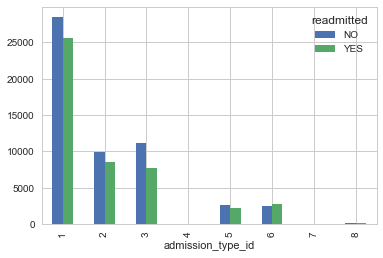

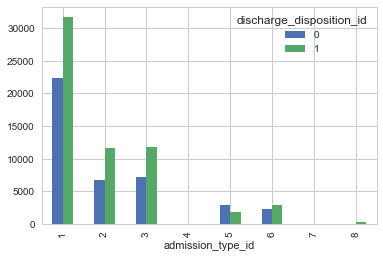

In [15]:
pd.crosstab(data.admission_type_id,data.readmitted).plot(kind='bar')
pd.crosstab(data.admission_type_id,data.discharge_disposition_id).plot(kind='bar')

The values 4 ,7, and 8 are neglegible, we will replace 4 to 8 with 0 (i.e. others)

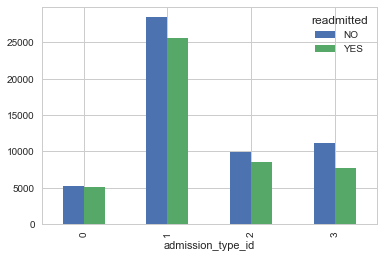

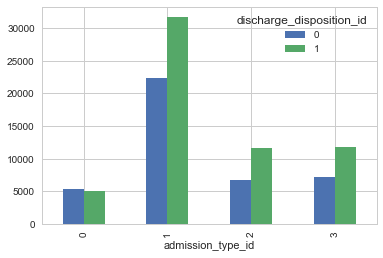

In [16]:
data['admission_type_id'] = data['admission_type_id'].replace({4:0, 5:0, 6:0, 7:0, 8:0})
data.admission_type_id.value_counts()
pd.crosstab(data.admission_type_id,data.readmitted).plot(kind='bar')
pd.crosstab(data.admission_type_id,data.discharge_disposition_id).plot(kind='bar')

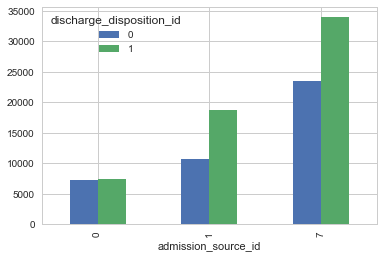

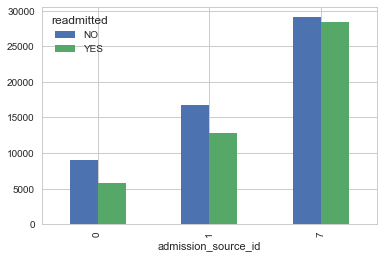

In [17]:
data.loc[(data['admission_source_id'] != 1) & (data['admission_source_id'] !=7 ), 'admission_source_id'] = 0
data.admission_source_id.value_counts()
pd.crosstab(data.admission_source_id,data.discharge_disposition_id).plot(kind='bar') 
pd.crosstab(data.admission_source_id,data.readmitted).plot(kind='bar') 

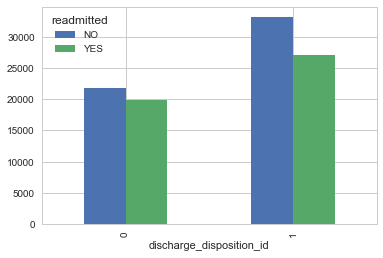

In [18]:
data.discharge_disposition_id.value_counts()
pd.crosstab(data.discharge_disposition_id,data.readmitted).plot(kind='bar')

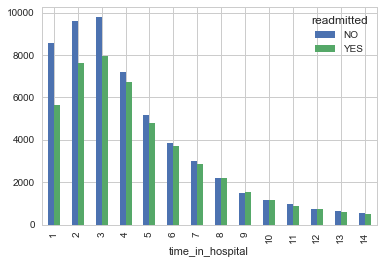

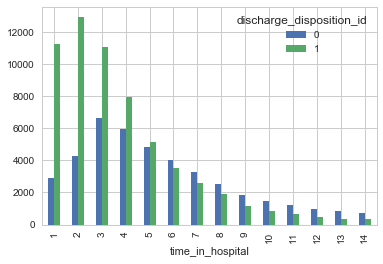

In [19]:
data.time_in_hospital.value_counts()
pd.crosstab(data.time_in_hospital,data.readmitted).plot(kind='bar')
pd.crosstab(data.time_in_hospital,data.discharge_disposition_id).plot(kind='bar')

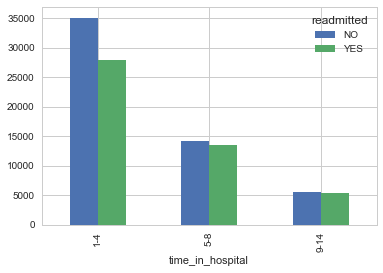

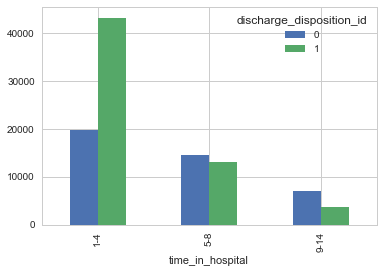

In [20]:
#x.replace([1, 2, 3, 4], [-1, -2, -3, -4])
data.time_in_hospital = data.time_in_hospital.replace([0,1,2,3,4], ['1-4','1-4', '1-4', '1-4', '1-4'])
data.time_in_hospital = data.time_in_hospital.replace([5,6,7,8], ['5-8', '5-8', '5-8', '5-8'])
data.time_in_hospital = data.time_in_hospital.replace([9,10,11,12,13,14], ['9-14', '9-14', '9-14', '9-14', '9-14', '9-14'])
data.time_in_hospital.value_counts()
data.time_in_hospital.value_counts()
pd.crosstab(data.time_in_hospital,data.readmitted).plot(kind='bar')
pd.crosstab(data.time_in_hospital,data.discharge_disposition_id).plot(kind='bar')

**Medical Specialty**

In [21]:
data.loc[(data['medical_specialty'] != 'missing') & (data['medical_specialty'] !='InternalMedicine' ) & 
         (data['medical_specialty'] !='Family/GeneralPractice') & (data['medical_specialty'] !='Cardiology') & 
         (data['medical_specialty'] !='Surgery-General') & (data['medical_specialty'] !='Emergency/Trauma'), 
         'medical_specialty'] = 'other'
data.medical_specialty.value_counts()
#data.medical_specialty.dtype

missing                   49949
InternalMedicine          14635
other                     13726
Emergency/Trauma           7565
Family/GeneralPractice     7440
Cardiology                 5352
Surgery-General            3099
Name: medical_specialty, dtype: int64

 * Neglecting medical specialty which has less than 3000 counts, and counting them all as "others"

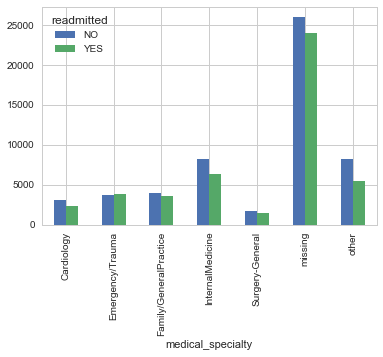

In [22]:
pd.crosstab(data.medical_specialty,data.readmitted).plot(kind='bar')

**num_lab_procedures**

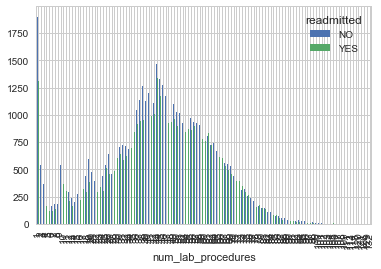

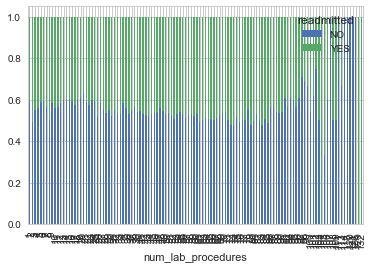

In [23]:
pd.crosstab(data.num_lab_procedures,data.readmitted).plot(kind='bar')
#data.num_lab_procedures.value_counts()
tlab = pd.crosstab(data.num_lab_procedures,data.readmitted)#.plot(kind='bar')
tlab.div(tlab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

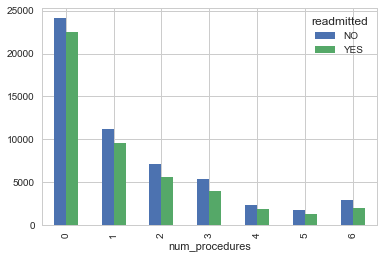

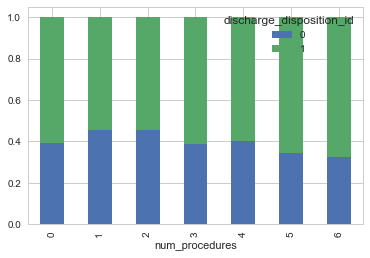

In [24]:
pd.crosstab(data.num_procedures,data.readmitted).plot(kind='bar')
tnp = pd.crosstab(data.num_procedures,data.discharge_disposition_id)#.plot(kind='bar')
tnp.div(tnp.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)


**Diagnosis**

In [25]:
filter_diag1 = data['diag_1'].astype(str).str.contains('250') # Primary Diagnosis
data.loc[filter_diag1, 'diag_1'] = 'diabetes'
data.loc[data['diag_1'] != 'diabetes', 'diag_1'] = 'other'

ICD 9 CODE with value 250.XX refers to the diagnosis as diabetes

In [26]:
data.diag_1.value_counts()

other       93009
diabetes     8757
Name: diag_1, dtype: int64

In [27]:
filter_diag2 = data['diag_2'].astype(str).str.contains('250') # Secondary Diagnosis
data.loc[filter_diag2, 'diag_2'] = 'diabetes'
data.loc[data['diag_2'] != 'diabetes', 'diag_2'] = 'other'

In [28]:
data.diag_2.value_counts()

other       88972
diabetes    12794
Name: diag_2, dtype: int64

In [29]:
filter_diag3 = data['diag_3'].astype(str).str.contains('250') # Secondary Diagnosis 2
data.loc[filter_diag3, 'diag_3'] = 'diabetes'
data.loc[data['diag_3'] != 'diabetes', 'diag_3'] = 'other'

In [282]:
data.diag_3.value_counts()

other       84609
diabetes    17157
Name: diag_3, dtype: int64

**Age**

In [30]:
data.loc[(data['age'] == '[0-10)') | (data['age'] =='[10-20)' ) | (data['age'] =='[20-30)'), 'age'] = '[0-30)'
data.loc[(data['age'] == '[40-50)') | (data['age'] =='[50-60)' ) | (data['age'] =='[60-70)') | 
         (data['age'] =='[30-40)'), 'age'] = '[30-70)'
data.loc[(data['age'] == '[70-80)') | (data['age'] =='[80-90)' ) | (data['age'] =='[90-100)'), 'age'] = '[70-100)'

In [31]:
data.age.value_counts()

[30-70)     53199
[70-100)    46058
[0-30)       2509
Name: age, dtype: int64

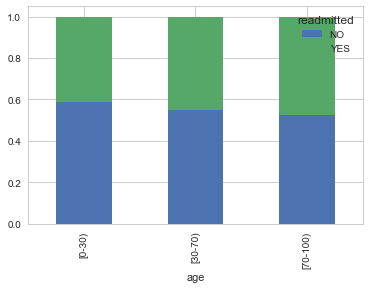

In [32]:
tage = pd.crosstab(data.age,data.readmitted)#.plot(kind='bar')
tage.div(tage.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


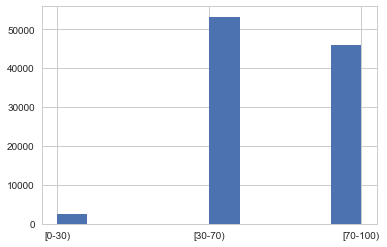

In [34]:
data.age.hist()

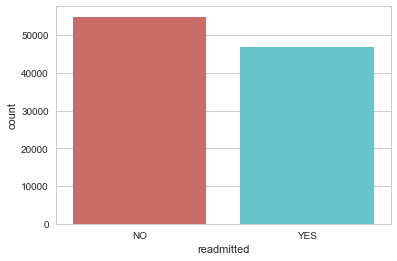

In [36]:
sns.countplot(x = 'readmitted', data =  data, palette = 'hls')
plt.show()

Creating dummy variables

In [37]:
cols = ['race','gender','age','admission_source_id','admission_type_id','time_in_hospital','discharge_disposition_id',
          'medical_specialty','diag_1','diag_2','diag_3','max_glu_serum','A1Cresult','change','diabetesMed']
#for var in cat_vars:
#    cat_list = 'var' + '_'+ var
#    cat_list = pd.get_dummies(data[var], prefix=var)
#    data1 = data.join(cat_list)
#    dataf = data1

#cat_vars = ['race','gender','age','admission_type_id','time_in_hospital','discharge_disposition_id','medical_specialty',
#          'admission_source_id','diag_1','diag_2','diag_3','max_glu_serum','A1Cresult','change','diabetesMed']
#data_vars = data.columns.values.tolist()
#to_keep = [i for i in data_vars if i not in cat_vars]


naku = pd.get_dummies(data, columns = cols) # change naku later!!

In [38]:
naku.columns

Index(['num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'readmitted', 'race_AfricanAmerican', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'race_missing',
       'gender_Female', 'gender_Male', 'gender_Unknown/Invalid', 'age_[0-30)',
       'age_[30-70)', 'age_[70-100)', 'admission_source_id_0',
       'admission_source_id_1', 'admission_source_id_7', 'admission_type_id_0',
       'admission_type_id_1', 'admission_type_id_2', 'admission_type_id_3',
       'time_in_hospital_1-4', 'time_in_hospital_5-8', 'time_in_hospital_9-14',
       'discharge_disposition_id_0', 'discharge_disposition_id_1',
       'medical_specialty_Cardiology', 'medical_specialty_Emergency/Trauma',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_InternalMedicine',
       'medical_specialty_Surgery-General', 'medical_specialty_missing',
       'medical_specialt

In [40]:
os_data_X = naku.loc[:, naku.columns != 'readmitted']
os_data_y = naku.loc[:, naku.columns == 'readmitted']

**Recursive Feature Elimination**

In [41]:
#data_xcols = data_fi.columns.values.tolist()
#y = ['readmitted']
#X = [i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 25, step = 1) # 30 is the numbers of features selected, bydefault it is half of the features present
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

print(rfe.support_)
print(rfe.ranking_)

[False False False False  True  True False  True  True  True False False
  True  True  True  True  True  True False  True False  True  True  True
 False  True  True False False False False False False False  True False
 False  True False  True False False False False  True False  True  True
 False False False  True False False  True False]
[32 22 29 11  1  1  9  1  1  1 21 14  1  1  1  1  1  1 15  1 27  1  1  1
  2  1  1 23 24  5  6 25 17 18  1 13 26  1 31  1 16  7 12  8  1 20  1  1
 10 19 28  1  4  3  1 30]


In [42]:
new_cols = ['number_emergency','number_inpatient','race_AfricanAmerican','race_Asian','race_Caucasian','race_missing',
            'gender_Female','gender_Male','gender_Unknown/Invalid','age_[0-30)','age_[30-70)','admission_source_id_0',
            'admission_source_id_7','admission_type_id_0','admission_type_id_1','admission_type_id_3','time_in_hospital_1-4',
            'medical_specialty_InternalMedicine','medical_specialty_other','diag_1_other','max_glu_serum_>200',
            'max_glu_serum_None','max_glu_serum_Norm','A1Cresult_Norm','diabetesMed_No']

In [43]:
#n = 55
#os_data_X.columns[n-1]

X = os_data_X[new_cols]
os_y = os_data_y.replace(['YES','NO'], [1,0])
y = os_y['readmitted']

In [44]:
import statsmodels.api as sm

logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


         Current function value: 0.652198
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                     Results: Logit
Model:                       Logit                   No. Iterations:          35.0000    
Dependent Variable:          readmitted              Pseudo R-squared:        0.055      
Date:                        2018-10-28 17:56        AIC:                     132793.2046
No. Observations:            101766                  BIC:                     133031.4654
Df Model:                    24                      Log-Likelihood:          -66372.    
Df Residuals:                101741                  LL-Null:                 -70227.    
Converged:                   0.0000                  Scale:                   1.0000     
-----------------------------------------------------------------------------------------
                                    Coef.   Std.Err.    z     P>|z|    [0.025     0.975] 
-----------------------------------------------------------------------------------------
number_emergency                     0.2393   0.

* let's remove the columns whose P-value is less than 0.05

In [45]:
new_cols = ['number_emergency','number_inpatient','race_AfricanAmerican','race_Asian','race_Caucasian','race_missing',
            'gender_Male','age_[0-30)','age_[30-70)','admission_source_id_0',
            'admission_source_id_7','admission_type_id_0','admission_type_id_1','admission_type_id_3','time_in_hospital_1-4',
            'medical_specialty_InternalMedicine','medical_specialty_other','diag_1_other',
            'max_glu_serum_Norm','A1Cresult_Norm','diabetesMed_No']

X = os_data_X[new_cols]
#os_y = os_data_y.replace(['YES','NO'], [1,0])
y = os_y['readmitted']

logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.652311
         Iterations 6
                                  Results: Logit
Model:                     Logit                 No. Iterations:        6.0000     
Dependent Variable:        readmitted            Pseudo R-squared:      0.055      
Date:                      2018-10-28 17:56      AIC:                   132808.2341
No. Observations:          101766                BIC:                   133008.3732
Df Model:                  20                    Log-Likelihood:        -66383.    
Df Residuals:              101745                LL-Null:               -70227.    
Converged:                 1.0000                Scale:                 1.0000     
-----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------------
number_em

In [46]:
# Logistic Regression fitting; FINALLY

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # X:indep.var, y:dep.var, not col names
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.62


In [48]:
os_y.readmitted.value_counts()

0    54864
1    46902
Name: readmitted, dtype: int64

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[13248  3178]
 [ 8503  5601]]


* The result is telling us that we have 13248+5601 correct predictions and 8503+3178 incorrect predictions.

**ROC Curve**

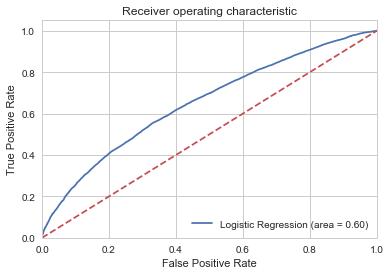

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) # gives area under the curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid
plt.show()

* The area under the curve is 0.60, which is not very good since 0.5 refers to the no discrimination ability of the model, and 1 corresponds to a perfect discrimination

In [1]:
2+2

4